<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Machine-learning" data-toc-modified-id="Machine-learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Machine learning</a></span></li><li><span><a href="#Fighting-imbalance" data-toc-modified-id="Fighting-imbalance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fighting imbalance</a></span></li><li><span><a href="#Testing-the-model" data-toc-modified-id="Testing-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing the model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Customer churn

Clients began to leave Beta Bank. Every month. A little, but noticeable. Bank marketers have calculated that it is cheaper to retain current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of contracts with the bank.

Build a model with an extremely large *F1*-measure. To pass the project successfully, you need to bring the metric to 0.59. Check the *F1*-measure on the test sample yourself.

Additionally, measure *AUC-ROC*, compare its value with the *F1* measure.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

RANDOM_STATE=12345
data=pd.read_csv('Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


The source data only contains gaps in the 'Tenure' column. There are no gaps in other columns.

In [2]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7777,7778,15638730,Macleod,711,France,Female,21,0.0,82844.33,2,0,1,1408.68,0
9074,9075,15630413,Howarth,608,France,Female,41,5.0,0.00,2,1,1,72462.25,0
9954,9955,15739850,Trentino,645,France,Male,45,6.0,155417.61,1,0,1,3449.22,0
3746,3747,15804709,Watt,688,Germany,Male,35,5.0,111578.18,1,0,0,166165.93,1
3852,3853,15639669,Forbes,746,France,Male,36,9.0,127157.04,1,1,1,155700.15,0
6233,6234,15682914,Bolton,850,France,Male,34,2.0,72079.71,1,1,1,115767.93,0
4027,4028,15718280,Luffman,662,Germany,Male,39,5.0,139822.11,2,1,1,146219.90,0
5660,5661,15737133,P'eng,706,Spain,Male,68,NaN,114386.85,1,1,1,28601.68,0
6846,6847,15809309,Longo,689,Spain,Female,40,5.0,154251.67,1,0,1,118319.50,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0


In [3]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

We will not need the RowNumber, CustomerID, Surname columns for training, so we delete them.

In [4]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)

To train the model, you need to convert the values in the Gender and Geography columns to numbers.

**Analysis of clients with blanks in the “Service period” column with all clients**

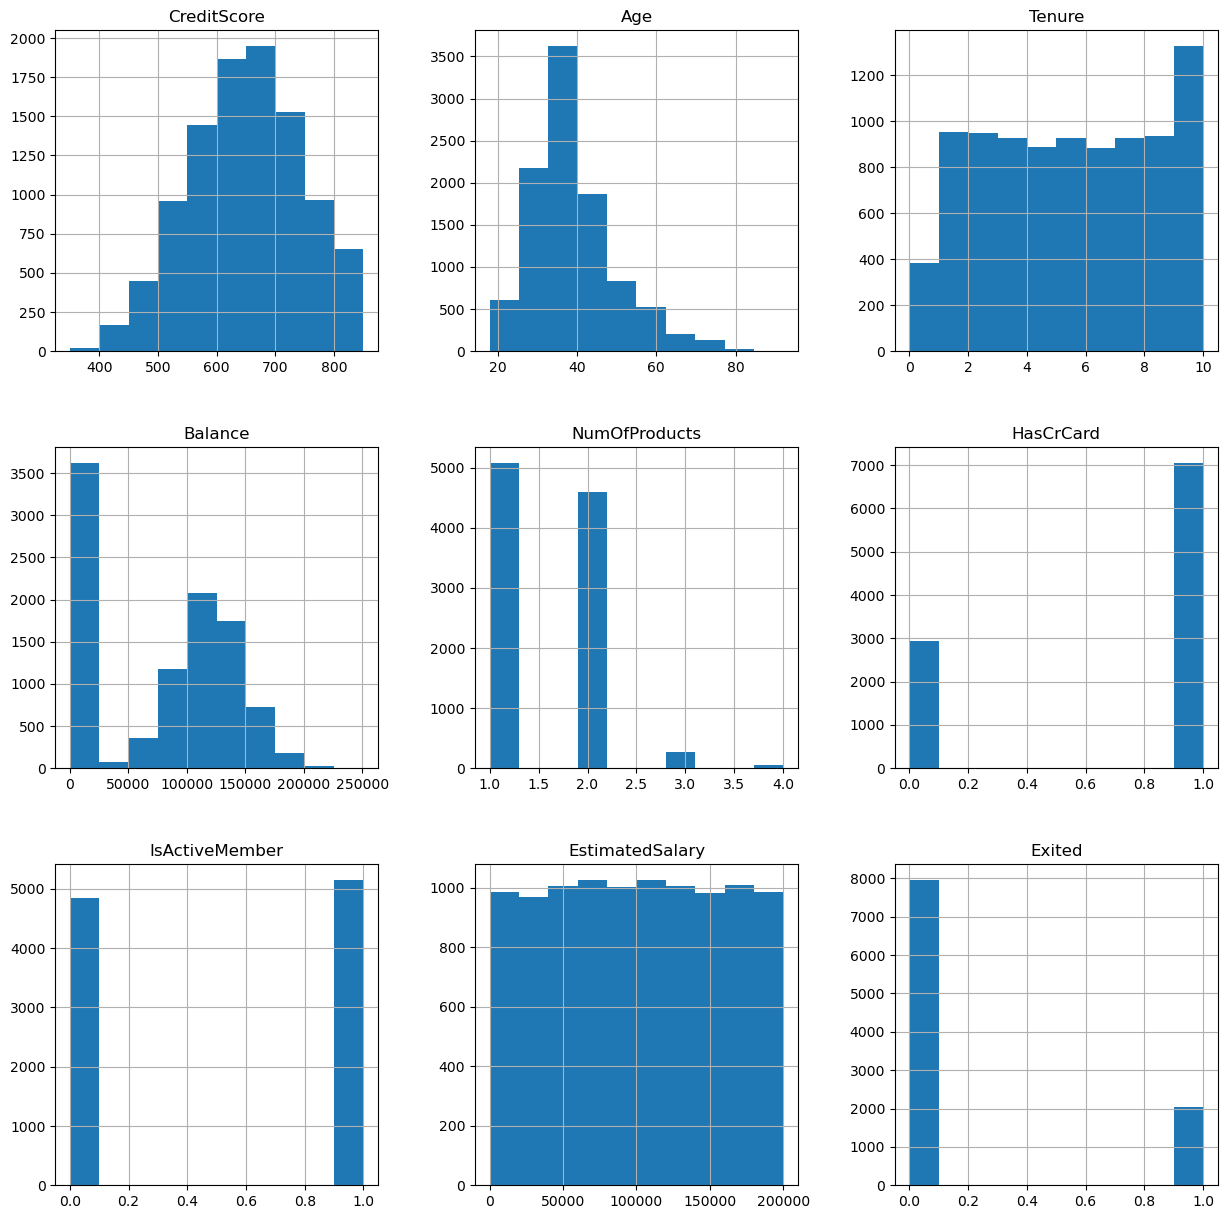

In [5]:
data.hist(figsize=(15, 15));

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

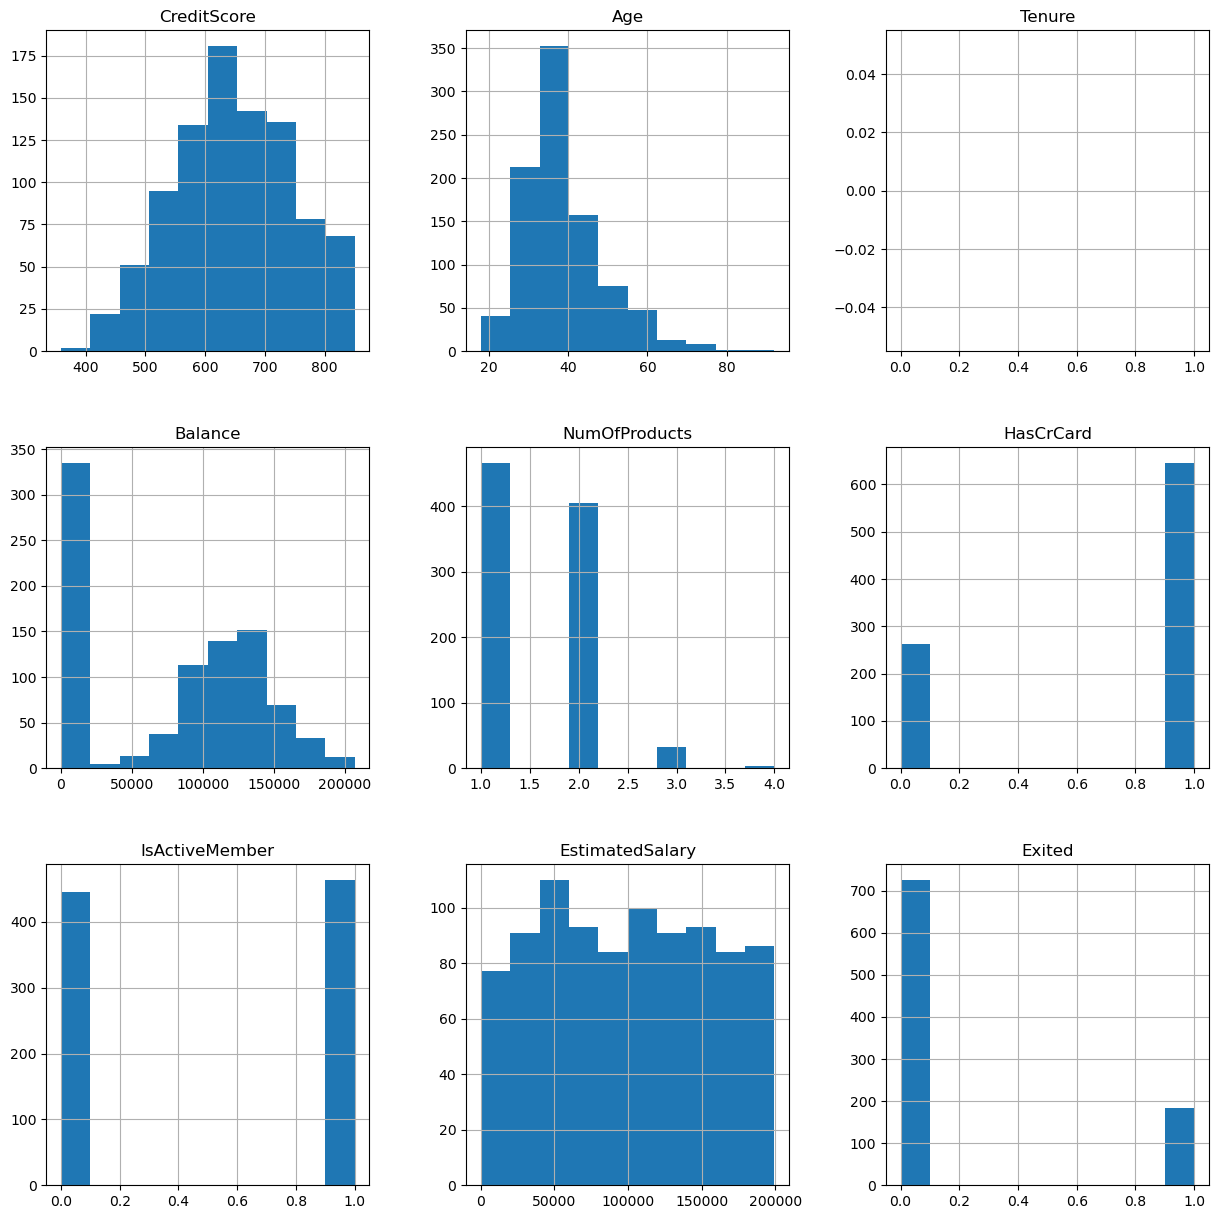

In [6]:
data.loc[data['Tenure'].isna()].hist(figsize=(15, 15))

From the comparison we see that this group practically does not stand out from the overall picture, so let’s delete the lines where real estate data is missing.

In [7]:
data = data.loc[~(data['Tenure'].isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Gender_Male        9091 non-null   bool   
 10  Geography_Germany  9091 non-null   bool   
 11  Geography_Spain    9091 non-null   bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 736.9 KB


In [8]:
data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
5124,721,46,7.0,137933.39,1,1,1,67976.57,0,False,False,True
4261,794,46,8.0,134593.79,1,1,1,46386.37,0,False,False,True
4258,782,35,7.0,98556.89,2,1,0,117644.36,0,True,True,False
7642,811,40,1.0,101514.89,1,1,1,121765.00,0,True,False,False
1987,738,54,4.0,0.00,1,0,1,55725.04,1,True,False,False
1130,571,34,1.0,101736.66,1,0,1,195651.66,0,False,True,False
3185,652,45,9.0,110827.49,1,1,1,153383.54,1,False,True,False
1848,518,35,8.0,141665.63,1,0,1,192776.64,0,False,True,False
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
2983,523,35,8.0,138782.76,1,1,1,186118.93,0,True,True,False


**Conclusion**
1. Removed gaps in the data
2. Prepared data for training models
3. Removed extra columns

## Machine learning

In [9]:
target = data['Exited']
features = data.drop('Exited', axis=1)

In [10]:
train, valid_and_test=train_test_split(data, test_size=0.4, random_state=RANDOM_STATE)
valid, test=train_test_split(valid_and_test, test_size=0.5, random_state=RANDOM_STATE)

train_features = train.drop(['Exited'], axis=1)
train_target = train['Exited']
valid_features = valid.drop(['Exited'], axis=1)
valid_target = valid['Exited']
valid_features = valid.drop(['Exited'], axis=1)
valid_target = valid['Exited']
test_features = test.drop(['Exited'], axis=1)
test_target = test['Exited']

print('Size of train sample:', train.shape[0])
print('Size of validation sample:', valid.shape[0])
print('Size of test sample:', test.shape[0])

Size of train sample: 5454
Size of validation sample: 1818
Size of test sample: 1819


**Scaling of numerical features**

In [11]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(train_features)
train_features = pd.DataFrame(scaler.transform(train_features))
train_target = train_target.reset_index(drop = True)

valid_features = pd.DataFrame(scaler.transform(valid_features))
valid_target = valid_target.reset_index(drop = True)

test_features = pd.DataFrame(scaler.transform(test_features))
test_target = test_target.reset_index(drop = True)

**Decision tree default**

In [12]:
best_result=0
best_est=0
best_depth=0
best_result1=0
auc_roc=0

for depth in range(1, 50, 2):
    model=DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(train_features, train_target)
    valid_predicted=model.predict(valid_features)
    result=f1_score(valid_target, valid_predicted)
    if result > best_result:
        best_result1 = result
        best_depth=depth
        probabilities_valid = model.predict_proba(valid_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc1 = roc_auc_score(valid_target, probabilities_one_valid)
            
print("Decision tree f1 score:", best_result1)
print ("AUC-ROC=", auc_roc1)
print ("Max depth=", best_depth)

Decision tree f1 score: 0.4702774108322325
AUC-ROC= 0.665984055428646
Max depth= 49


**Random forest default**

In [13]:
best_result2=0
for est in range (1, 100, 10):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est)
    model.fit(train_features, train_target)
    valid_predicted=model.predict(valid_features)
    result=f1_score(valid_target, valid_predicted)
    if result>best_result2:
        best_result2=result
        best_est=est
        probabilities_valid = model.predict_proba(valid_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc2 = roc_auc_score(valid_target, probabilities_one_valid)

print("Random Forest f1 score=", best_result2)
print ("AUC-ROC=", auc_roc2)
print ("n_estimators=", best_est)

Random Forest f1 score= 0.5845648604269295
AUC-ROC= 0.8580763800558483
n_estimators= 81


**Logistic Regression default**

In [14]:
model = LogisticRegression(random_state = RANDOM_STATE, solver = 'lbfgs', max_iter=1000)
model.fit(train_features,train_target)
valid_predicted = model.predict(valid_features)
best_result3 = f1_score(valid_target, valid_predicted)
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc3 = roc_auc_score(valid_target, probabilities_one_valid)
print ('Logistic Regression f1 score=', best_result3)
print ("AUC-ROC=", auc_roc3)

Logistic Regression f1 score= 0.3033932135728543
AUC-ROC= 0.7736172750650245


**Conclusion**

With the original data, the random forest model showed the best result.

f1 score is 0.586, which is 0.04 below the target.

## Fighting imbalance

In [15]:
target.loc[data['Exited'] == 0].count() / target.loc[data['Exited'] == 1].count()

3.9034519956850056

Количество оставшихся пользователей превышает кол-во ушедших практически в 4 раза.

<Axes: title={'center': 'Current and previous clients'}, xlabel='Exited'>

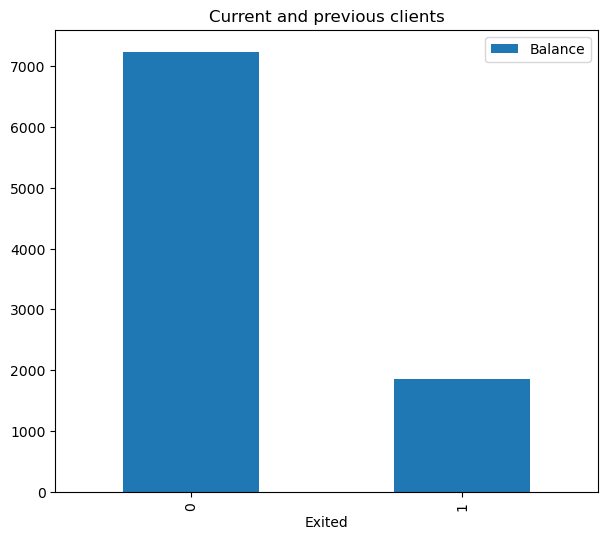

In [16]:
data.groupby(['Exited']).count().plot(kind='bar', y='Balance', figsize=(7,6), title='Current and previous clients')

**Upscale**

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

In [18]:
features_upsampled, target_upsampled = upsample(train_features, train_target, 4)

**Decision Tree upsample**

In [19]:
best_result4=0

for depth in range(1, 20):
    model=DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    valid_predicted=model.predict(valid_features)
    result=f1_score(valid_target, valid_predicted)
    if result > best_result4:
        DT_upscale = model
        best_result4 = result
        best_depth=depth
        probabilities_valid = model.predict_proba(valid_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc4 = roc_auc_score(valid_target, probabilities_one_valid)
        
print("Decision tree f1_score:", best_result4)
print ("AUC-ROC=", auc_roc4)
print ("max_depth=", best_depth)

Decision tree f1_score: 0.5735449735449736
AUC-ROC= 0.8396523192522141
max_depth= 5


**Random Forest upsample**

In [20]:
best_result5=0

for est in range (1, 100, 10):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    valid_predicted=model.predict(valid_features)
    result=f1_score(valid_target, valid_predicted)
    if result>best_result5:
        best_result5=result
        best_est=est
        probabilities_valid = model.predict_proba(valid_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc5 = roc_auc_score(valid_target, probabilities_one_valid)
        
print("Random Forest f1_score=", best_result5)
print ("AUC-ROC=", auc_roc5)
print ("n_estimators=", best_est)

Random Forest f1_score= 0.6394160583941606
AUC-ROC= 0.8547096493924606
n_estimators= 51


**Logistic regression upsample**

In [21]:
model = LogisticRegression(random_state = RANDOM_STATE, solver = 'lbfgs', max_iter=1000)
model.fit(features_upsampled,target_upsampled)
valid_predicted = model.predict(valid_features)
best_result6 = f1_score(valid_target, valid_predicted)
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc6 = roc_auc_score(valid_target, probabilities_one_valid)

print ('Logistic Regression f1 score=', best_result6)
print ("AUC-ROC=", auc_roc6)

Logistic Regression f1 score= 0.5081374321880651
AUC-ROC= 0.7778620431950256


**Downsample**

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

In [23]:
features_downsampled, target_downsampled = downsample(train_features, train_target, 0.25)

**Decision Tree downsample**

In [24]:
best_result7=0

for depth in range(1, 20):
    model=DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    valid_predicted=model.predict(valid_features)
    result=f1_score(valid_target, valid_predicted)
    if result > best_result7:
        best_result7 = result
        best_depth=depth
        probabilities_valid = model.predict_proba(valid_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc7 = roc_auc_score(valid_target, probabilities_one_valid)
            
print("Decision tree f1_score:", best_result7)
print ("AUC-ROC=", auc_roc7)
print ("max_depth=", best_depth)

Decision tree f1_score: 0.5636704119850188
AUC-ROC= 0.8343500405885245
max_depth= 6


**Random Forest downsample**

In [25]:
best_result8=0

for est in range (1, 100, 10):
    model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est)
    model.fit(features_downsampled, target_downsampled)
    valid_predicted=model.predict(valid_features)
    result=f1_score(valid_target, valid_predicted)
    if result>best_result8:
        best_result8=result
        best_est=est
        probabilities_valid = model.predict_proba(valid_features)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc8 = roc_auc_score(valid_target, probabilities_one_valid)
        
print("Random Forest f1_score=", best_result8)
print ("AUC-ROC=", auc_roc8)
print ("n_estimators=", best_est)

Random Forest f1_score= 0.5907752698724239
AUC-ROC= 0.8557248226898134
n_estimators= 61


**Logistic Regression downsample**

In [26]:
model = LogisticRegression(random_state = RANDOM_STATE, solver = 'lbfgs', max_iter=1000)
model.fit(features_downsampled,target_downsampled)
valid_predicted = model.predict(valid_features)
best_result9 = f1_score(valid_target, valid_predicted)
probabilities_valid = model.predict_proba(valid_features)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc9 = roc_auc_score(valid_target, probabilities_one_valid)
        
print ('Logistic Regression f1 score=', best_result9)
print ("AUC-ROC=", auc_roc9)

Logistic Regression f1 score= 0.5053763440860214
AUC-ROC= 0.7769379869932647


**Conclusion**

To combat the imbalance, two methods were used: increasing the sampling (upsampling) and decreasing the sampling (downsampling).

In both methods, the best f1_score for the Random Forest model is 0.636 and 0.592, respectively.

For testing we will use the Random Forest upsample model.

In [27]:
table1={'Model':['Decision Tree', 'Random Forest', 'Logistic Regression'],\
      'Default':[best_result1, best_result2, best_result3],\
      'Downsample':[best_result7, best_result8, best_result9],\
      'Upsample':[best_result4, best_result5, best_result6],}
best_f1_scores=pd.DataFrame(table1)
print(best_f1_scores)

                 Model   Default  Downsample  Upsample
0        Decision Tree  0.470277    0.563670  0.573545
1        Random Forest  0.584565    0.590775  0.639416
2  Logistic Regression  0.303393    0.505376  0.508137


In [28]:
table2={'Model':['Decision Tree', 'Random Forest', 'Logistic Regression'],\
      'Default':[auc_roc1, auc_roc2, auc_roc3],\
      'Downsample':[auc_roc7, auc_roc8, auc_roc9],\
      'Upsample':[auc_roc4, auc_roc5, auc_roc6],}
best_auc_roc_scores=pd.DataFrame(table2)
print(best_auc_roc_scores)

                 Model   Default  Downsample  Upsample
0        Decision Tree  0.665984    0.834350  0.839652
1        Random Forest  0.858076    0.855725  0.854710
2  Logistic Regression  0.773617    0.776938  0.777862


## Testing the model

In [29]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=51)
model.fit(features_upsampled, target_upsampled)
valid_predicted=model.predict(test_features)
result=f1_score(test_target, valid_predicted)
print('f1 of the best model:', result)

f1 of the best model: 0.5943536404160475


**AUC-ROC**

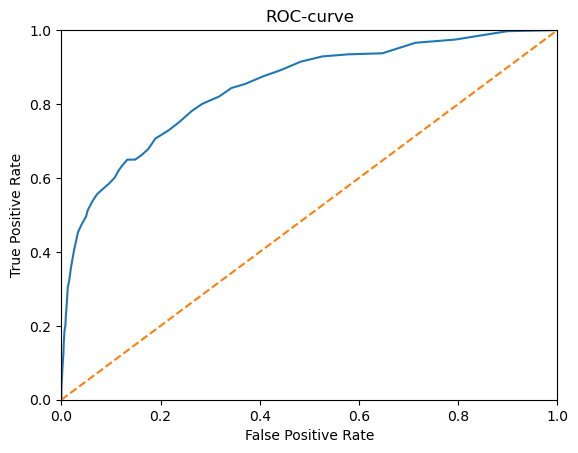

AUC-ROC= 0.8445876708819489


In [30]:
probabilities_test = model.predict_proba(test_features)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(test_target, probabilities_one_test)
fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_test)


plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()
print("AUC-ROC=", auc_roc)

## Conclusion
The data of the bank's clients was studied and an adequate model was built to predict people's behavior, which will allow the bank to maintain its audience.

At the first stage, gaps in the data were removed and a sample was prepared for machine learning. Next, three different models were built and the basic results from which we started were obtained.

There is a strong imbalance in the database: there are 4 times more current bank clients than departed ones. To eliminate this drawback, two methods were used: increasing and decreasing the sample (upsample and downsample, respectively).

The Random Forest upsample model showed the best results. The f1_score on the test sample is **0.594**, which is higher than the target, and AUC-ROC=**0.844**, which indicates the adequacy of the resulting model.